# Predict heart disease

## Problem statement
As a part of health check automation, it is required to provide a preliminary
diagnosis of whether, a given patient is likely to have heart disease, based
on his/her medical records

# Dataset Description
<b>Age</b> - age in years<br>
<b>Sex</b> –<br>
1 = male;<br>
0 = female<br>
<b>ChestPain</b> –<br>
1: typical angina<br>
2: atypical angina<br>
3: non-anginal pain<br>
4: asymptomatic<br>
<b>Rest_bp</b> – resting BP (mm Hg on admission to the hospital)<br>
<b>Cholesterol</b> - serum cholesterol in mg/dl<br>
<b>Fast_bld_sugar </b></b>- (fasting blood sugar > 120 mg/dl)<br>
(1 = true; 0 = false)<br>
<b>Rest_Ecg</b> –<br>
0: normal<br>
1: abnormal<br>
2: probable or definite left ventricular enlargement<br>
<b>Max_Rt</b> - maximum heart rate achieved<br>
<b>Ex_Angina</b></b> - exercise induced angina<br>
1 = yes;<br>
0 = no<br>
<b>St_Depr</b> - ST depression induced by exercise relative to rest<br>
<b>Slope</b> - the slope of the peak exercise ST segment<br>
1: upsloping<br>
2: flat<br>
3: down sloping<br>
<b>Colored_Vessels</b> - number of major vessels (0-3) colored by flourosopy
Thalassemi

In [687]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


import warnings
import matplotlib.cbook
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

In [587]:
df=pd.read_csv("Comb_heart_Data.csv")

In [588]:
df.head()

,Age,Sex,ChestPain,Rest_bp,Cholestrol,Fast_bld_sugar,Rest_Ecg,Max_Rt,Ex_Angina,St_Depr,Slope,Colored_Vessels,Thalassemia,Target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [589]:
df.Target.value_counts()

0    387
1    214
2    145
3    142
4     41
Name: Target, dtype: int64

In [590]:
df.shape

(929, 14)

### Since the problem is to classifiy if the patient has heart disease or not we can convert all the target datapoints in terms of 0 and 1 
0: no heart disease
1: has heart disease  

In [591]:
df1=df.copy()

In [592]:
df1.Target=df1.Target.apply(lambda x:1 if x!=0 else 0)

In [593]:
df1.head()

,Age,Sex,ChestPain,Rest_bp,Cholestrol,Fast_bld_sugar,Rest_Ecg,Max_Rt,Ex_Angina,St_Depr,Slope,Colored_Vessels,Thalassemia,Target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [594]:
df1.replace("?",np.NAN,inplace=True)

In [595]:
df1.Target.value_counts()

1    542
0    387
Name: Target, dtype: int64

In [596]:
df1.Target=df1.Target.astype("object")

In [597]:
df1.isnull().sum()#no null values

Age                  0
Sex                  0
ChestPain            0
Rest_bp             58
Cholestrol           7
Fast_bld_sugar      82
Rest_Ecg             1
Max_Rt              54
Ex_Angina           54
St_Depr             62
Slope              119
Colored_Vessels    324
Thalassemia        222
Target               0
dtype: int64

In [598]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              929 non-null    int64 
 1   Sex              929 non-null    int64 
 2   ChestPain        929 non-null    int64 
 3   Rest_bp          871 non-null    object
 4   Cholestrol       922 non-null    object
 5   Fast_bld_sugar   847 non-null    object
 6   Rest_Ecg         928 non-null    object
 7   Max_Rt           875 non-null    object
 8   Ex_Angina        875 non-null    object
 9   St_Depr          867 non-null    object
 10  Slope            810 non-null    object
 11  Colored_Vessels  605 non-null    object
 12  Thalassemia      707 non-null    object
 13  Target           929 non-null    object
dtypes: int64(3), object(11)
memory usage: 101.7+ KB


### Descriptive Statistics 

In [599]:
df1.shape

(929, 14)

In [600]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              929 non-null    int64 
 1   Sex              929 non-null    int64 
 2   ChestPain        929 non-null    int64 
 3   Rest_bp          871 non-null    object
 4   Cholestrol       922 non-null    object
 5   Fast_bld_sugar   847 non-null    object
 6   Rest_Ecg         928 non-null    object
 7   Max_Rt           875 non-null    object
 8   Ex_Angina        875 non-null    object
 9   St_Depr          867 non-null    object
 10  Slope            810 non-null    object
 11  Colored_Vessels  605 non-null    object
 12  Thalassemia      707 non-null    object
 13  Target           929 non-null    object
dtypes: int64(3), object(11)
memory usage: 101.7+ KB


In [601]:
df1.describe()

,Age,Sex,ChestPain
count,929.000000,929.000000,929.000000
mean,55.612487,0.773950,3.304629
std,8.994760,0.418497,0.917261
min,29.000000,0.000000,1.000000
25%,50.000000,1.000000,3.000000
50%,57.000000,1.000000,4.000000
75%,62.000000,1.000000,4.000000
max,77.000000,1.000000,4.000000


Most variables have wrong datatypes some int values are stored as objects and vice versa we need to correct that

In [602]:
df1.Sex=df1.Sex.astype('object')#gender must be categorical and not int

In [603]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              929 non-null    int64 
 1   Sex              929 non-null    object
 2   ChestPain        929 non-null    int64 
 3   Rest_bp          871 non-null    object
 4   Cholestrol       922 non-null    object
 5   Fast_bld_sugar   847 non-null    object
 6   Rest_Ecg         928 non-null    object
 7   Max_Rt           875 non-null    object
 8   Ex_Angina        875 non-null    object
 9   St_Depr          867 non-null    object
 10  Slope            810 non-null    object
 11  Colored_Vessels  605 non-null    object
 12  Thalassemia      707 non-null    object
 13  Target           929 non-null    object
dtypes: int64(2), object(12)
memory usage: 101.7+ KB


In [604]:
df1.head() 

,Age,Sex,ChestPain,Rest_bp,Cholestrol,Fast_bld_sugar,Rest_Ecg,Max_Rt,Ex_Angina,St_Depr,Slope,Colored_Vessels,Thalassemia,Target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [605]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              929 non-null    int64 
 1   Sex              929 non-null    object
 2   ChestPain        929 non-null    int64 
 3   Rest_bp          871 non-null    object
 4   Cholestrol       922 non-null    object
 5   Fast_bld_sugar   847 non-null    object
 6   Rest_Ecg         928 non-null    object
 7   Max_Rt           875 non-null    object
 8   Ex_Angina        875 non-null    object
 9   St_Depr          867 non-null    object
 10  Slope            810 non-null    object
 11  Colored_Vessels  605 non-null    object
 12  Thalassemia      707 non-null    object
 13  Target           929 non-null    object
dtypes: int64(2), object(12)
memory usage: 101.7+ KB


In [606]:
df1.isnull().sum()

Age                  0
Sex                  0
ChestPain            0
Rest_bp             58
Cholestrol           7
Fast_bld_sugar      82
Rest_Ecg             1
Max_Rt              54
Ex_Angina           54
St_Depr             62
Slope              119
Colored_Vessels    324
Thalassemia        222
Target               0
dtype: int64

In [607]:
df1.ChestPain=df1.ChestPain.astype("object")#chestPain has 4 categories ie it can not be integer

NOTE:the above has an error because Rest_bp has some values that are '?' that must be converted to NAN and then dealt with

In [608]:
df1[df1.isnull().any(axis=1)] # many columns are presesnt that have '?'' as values.. need to convert that to NAN

,Age,Sex,ChestPain,Rest_bp,Cholestrol,Fast_bld_sugar,Rest_Ecg,Max_Rt,Ex_Angina,St_Depr,Slope,Colored_Vessels,Thalassemia,Target
87,53,0,3,128,216,0,2,115,0,0,1,0,NaN,0
166,52,1,3,138,223,0,0,169,0,0,1,NaN,3,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7,1
266,52,1,4,128,204,1,0,156,1,1,2,0,NaN,1
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
925,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
926,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,1
927,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [609]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              929 non-null    int64 
 1   Sex              929 non-null    object
 2   ChestPain        929 non-null    object
 3   Rest_bp          871 non-null    object
 4   Cholestrol       922 non-null    object
 5   Fast_bld_sugar   847 non-null    object
 6   Rest_Ecg         928 non-null    object
 7   Max_Rt           875 non-null    object
 8   Ex_Angina        875 non-null    object
 9   St_Depr          867 non-null    object
 10  Slope            810 non-null    object
 11  Colored_Vessels  605 non-null    object
 12  Thalassemia      707 non-null    object
 13  Target           929 non-null    object
dtypes: int64(1), object(13)
memory usage: 101.7+ KB


In [610]:
df1.isnull().sum()

Age                  0
Sex                  0
ChestPain            0
Rest_bp             58
Cholestrol           7
Fast_bld_sugar      82
Rest_Ecg             1
Max_Rt              54
Ex_Angina           54
St_Depr             62
Slope              119
Colored_Vessels    324
Thalassemia        222
Target               0
dtype: int64

In [611]:
#Replace missing value in cholestrol with mean

In [612]:
df1.Cholestrol=df1.Cholestrol.astype("float")

In [613]:
df1.Cholestrol=df1.Cholestrol.fillna(df1.Cholestrol.mean())

In [614]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              929 non-null    int64  
 1   Sex              929 non-null    object 
 2   ChestPain        929 non-null    object 
 3   Rest_bp          871 non-null    object 
 4   Cholestrol       929 non-null    float64
 5   Fast_bld_sugar   847 non-null    object 
 6   Rest_Ecg         928 non-null    object 
 7   Max_Rt           875 non-null    object 
 8   Ex_Angina        875 non-null    object 
 9   St_Depr          867 non-null    object 
 10  Slope            810 non-null    object 
 11  Colored_Vessels  605 non-null    object 
 12  Thalassemia      707 non-null    object 
 13  Target           929 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 101.7+ KB


In [615]:
df1.isnull().sum()

Age                  0
Sex                  0
ChestPain            0
Rest_bp             58
Cholestrol           0
Fast_bld_sugar      82
Rest_Ecg             1
Max_Rt              54
Ex_Angina           54
St_Depr             62
Slope              119
Colored_Vessels    324
Thalassemia        222
Target               0
dtype: int64

In [616]:
# Replacing missing values of Rest_bp with median value

In [617]:
df1.Rest_bp=df1.Rest_bp.astype("float")

In [618]:
df1.Rest_bp.median()

130.0

In [619]:
imputer=SimpleImputer(strategy="median")
imputed=imputer.fit_transform(df1[["Rest_bp"]])


In [620]:
df1[['Rest_bp']]=pd.DataFrame(imputed,columns=['Rest_bp'])

In [621]:
df1.isnull().sum()

Age                  0
Sex                  0
ChestPain            0
Rest_bp              0
Cholestrol           0
Fast_bld_sugar      82
Rest_Ecg             1
Max_Rt              54
Ex_Angina           54
St_Depr             62
Slope              119
Colored_Vessels    324
Thalassemia        222
Target               0
dtype: int64

In [622]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              929 non-null    int64  
 1   Sex              929 non-null    object 
 2   ChestPain        929 non-null    object 
 3   Rest_bp          929 non-null    float64
 4   Cholestrol       929 non-null    float64
 5   Fast_bld_sugar   847 non-null    object 
 6   Rest_Ecg         928 non-null    object 
 7   Max_Rt           875 non-null    object 
 8   Ex_Angina        875 non-null    object 
 9   St_Depr          867 non-null    object 
 10  Slope            810 non-null    object 
 11  Colored_Vessels  605 non-null    object 
 12  Thalassemia      707 non-null    object 
 13  Target           929 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 101.7+ KB


In [623]:
imputer=SimpleImputer(strategy="median")
imputed=imputer.fit_transform(df1[["Fast_bld_sugar","Rest_Ecg","Max_Rt","Ex_Angina","St_Depr","Slope","Colored_Vessels","Thalassemia"]])


In [624]:
df1[["Fast_bld_sugar","Rest_Ecg","Max_Rt","Ex_Angina","St_Depr","Slope","Colored_Vessels","Thalassemia"]]=pd.DataFrame(imputed,columns=["Fast_bld_sugar","Rest_Ecg","Max_Rt","Ex_Angina","St_Depr","Slope","Colored_Vessels","Thalassemia"])

In [625]:
df1.isnull().sum()

Age                0
Sex                0
ChestPain          0
Rest_bp            0
Cholestrol         0
Fast_bld_sugar     0
Rest_Ecg           0
Max_Rt             0
Ex_Angina          0
St_Depr            0
Slope              0
Colored_Vessels    0
Thalassemia        0
Target             0
dtype: int64

In [626]:
df1.head()

,Age,Sex,ChestPain,Rest_bp,Cholestrol,Fast_bld_sugar,Rest_Ecg,Max_Rt,Ex_Angina,St_Depr,Slope,Colored_Vessels,Thalassemia,Target
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [627]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              929 non-null    int64  
 1   Sex              929 non-null    object 
 2   ChestPain        929 non-null    object 
 3   Rest_bp          929 non-null    float64
 4   Cholestrol       929 non-null    float64
 5   Fast_bld_sugar   929 non-null    float64
 6   Rest_Ecg         929 non-null    float64
 7   Max_Rt           929 non-null    float64
 8   Ex_Angina        929 non-null    float64
 9   St_Depr          929 non-null    float64
 10  Slope            929 non-null    float64
 11  Colored_Vessels  929 non-null    float64
 12  Thalassemia      929 non-null    float64
 13  Target           929 non-null    object 
dtypes: float64(10), int64(1), object(3)
memory usage: 101.7+ KB


In [628]:
df1.Fast_bld_sugar=df1.Fast_bld_sugar.astype("object")
df1.Rest_Ecg=df1.Rest_Ecg.astype("object")
df1.Ex_Angina=df1.Ex_Angina.astype("object")
df1.Slope =df1.Slope.astype("object")
df1.Colored_Vessels=df1.Colored_Vessels.astype("object")
df1.Thalassemia=df1.Thalassemia.astype("object")

In [629]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              929 non-null    int64  
 1   Sex              929 non-null    object 
 2   ChestPain        929 non-null    object 
 3   Rest_bp          929 non-null    float64
 4   Cholestrol       929 non-null    float64
 5   Fast_bld_sugar   929 non-null    object 
 6   Rest_Ecg         929 non-null    object 
 7   Max_Rt           929 non-null    float64
 8   Ex_Angina        929 non-null    object 
 9   St_Depr          929 non-null    float64
 10  Slope            929 non-null    object 
 11  Colored_Vessels  929 non-null    object 
 12  Thalassemia      929 non-null    object 
 13  Target           929 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 101.7+ KB


In [630]:
df1.head()

,Age,Sex,ChestPain,Rest_bp,Cholestrol,Fast_bld_sugar,Rest_Ecg,Max_Rt,Ex_Angina,St_Depr,Slope,Colored_Vessels,Thalassemia,Target
0,63,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,67,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,1
2,67,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,37,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,41,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


In [631]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,929.0,55.612487,8.994760,29.0,50.0,57.0,62.0,77.0
Rest_bp,929.0,131.712594,18.439798,0.0,120.0,130.0,140.0,200.0
Cholestrol,929.0,199.559653,106.087549,0.0,180.0,226.0,266.0,564.0
Max_Rt,929.0,141.355221,25.604855,60.0,123.0,144.0,161.0,202.0
St_Depr,929.0,1.018622,1.113479,-2.6,0.0,0.8,1.6,6.2


## EDA

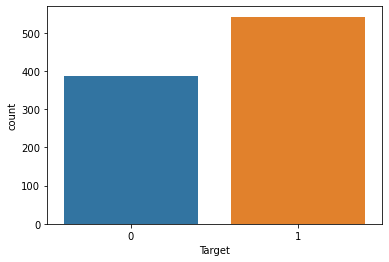

In [632]:
sns.countplot(df1.Target)

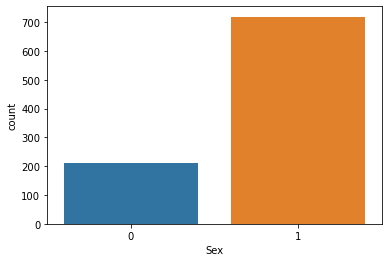

In [633]:
sns.countplot(df1.Sex)

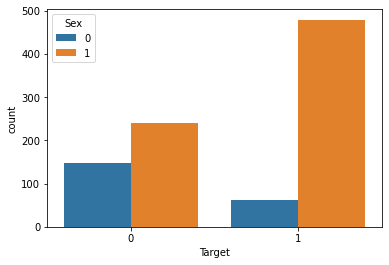

In [634]:
sns.countplot(df1.Target,hue=df1.Sex)

(array([  3.,  32.,  79.,  92., 102., 194., 217., 139.,  53.,  18.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <a list of 10 Patch objects>)

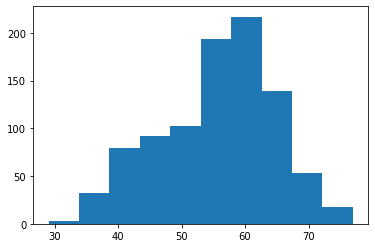

In [635]:
plt.hist(df1.Age)

In [636]:
df1.Age.skew()

-0.3138344083994114

## data preprocessing

In [637]:
### dummy variables

In [638]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              929 non-null    int64  
 1   Sex              929 non-null    object 
 2   ChestPain        929 non-null    object 
 3   Rest_bp          929 non-null    float64
 4   Cholestrol       929 non-null    float64
 5   Fast_bld_sugar   929 non-null    object 
 6   Rest_Ecg         929 non-null    object 
 7   Max_Rt           929 non-null    float64
 8   Ex_Angina        929 non-null    object 
 9   St_Depr          929 non-null    float64
 10  Slope            929 non-null    object 
 11  Colored_Vessels  929 non-null    object 
 12  Thalassemia      929 non-null    object 
 13  Target           929 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 101.7+ KB


In [639]:
df1.head()

,Age,Sex,ChestPain,Rest_bp,Cholestrol,Fast_bld_sugar,Rest_Ecg,Max_Rt,Ex_Angina,St_Depr,Slope,Colored_Vessels,Thalassemia,Target
0,63,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,67,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,1
2,67,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,37,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,41,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


In [640]:
a = pd.get_dummies(df1['Sex'], prefix = "Sex")
b = pd.get_dummies(df1['ChestPain'], prefix = "chestpain")
c = pd.get_dummies(df1['Fast_bld_sugar'], prefix = "Fast_bld_sugar")
d = pd.get_dummies(df1['Rest_Ecg'], prefix = "Rest_Ecg")
e = pd.get_dummies(df1['Ex_Angina'], prefix = "Ex_Angina")
f = pd.get_dummies(df1['Slope'], prefix = "Slope")
g = pd.get_dummies(df1['Colored_Vessels'], prefix = "Colored_Vessels")
h = pd.get_dummies(df1['Thalassemia'], prefix = "Thalassemia")


In [641]:
frames = [df1, a, b, c,d,e,f,g,h]
df1 = pd.concat(frames, axis = 1)
df1.head()

,Age,Sex,ChestPain,Rest_bp,Cholestrol,Fast_bld_sugar,Rest_Ecg,Max_Rt,Ex_Angina,St_Depr,...,Slope_1.0,Slope_2.0,Slope_3.0,Colored_Vessels_0.0,Colored_Vessels_1.0,Colored_Vessels_2.0,Colored_Vessels_3.0,Thalassemia_3.0,Thalassemia_6.0,Thalassemia_7.0
0,63,1,1,145.0,233.0,1,2,150.0,0,2.3,...,0,0,1,1,0,0,0,0,1,0
1,67,1,4,160.0,286.0,0,2,108.0,1,1.5,...,0,1,0,0,0,0,1,1,0,0
2,67,1,4,120.0,229.0,0,2,129.0,1,2.6,...,0,1,0,0,0,1,0,0,0,1
3,37,1,3,130.0,250.0,0,0,187.0,0,3.5,...,0,0,1,1,0,0,0,1,0,0
4,41,0,2,130.0,204.0,0,2,172.0,0,1.4,...,1,0,0,1,0,0,0,1,0,0


In [642]:
df1.drop(["Sex","ChestPain","Fast_bld_sugar","Rest_Ecg","Ex_Angina","Slope","Colored_Vessels","Thalassemia"],axis=1,inplace=True)

In [643]:
df1.head()

,Age,Rest_bp,Cholestrol,Max_Rt,St_Depr,Target,Sex_0,Sex_1,chestpain_1,chestpain_2,...,Slope_1.0,Slope_2.0,Slope_3.0,Colored_Vessels_0.0,Colored_Vessels_1.0,Colored_Vessels_2.0,Colored_Vessels_3.0,Thalassemia_3.0,Thalassemia_6.0,Thalassemia_7.0
0,63,145.0,233.0,150.0,2.3,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
1,67,160.0,286.0,108.0,1.5,1,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67,120.0,229.0,129.0,2.6,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37,130.0,250.0,187.0,3.5,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
4,41,130.0,204.0,172.0,1.4,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0


In [644]:
df1.columns

Index(['Age', 'Rest_bp', 'Cholestrol', 'Max_Rt', 'St_Depr', 'Target', 'Sex_0',
       'Sex_1', 'chestpain_1', 'chestpain_2', 'chestpain_3', 'chestpain_4',
       'Fast_bld_sugar_0.0', 'Fast_bld_sugar_1.0', 'Rest_Ecg_0.0',
       'Rest_Ecg_1.0', 'Rest_Ecg_2.0', 'Ex_Angina_0.0', 'Ex_Angina_1.0',
       'Slope_1.0', 'Slope_2.0', 'Slope_3.0', 'Colored_Vessels_0.0',
       'Colored_Vessels_1.0', 'Colored_Vessels_2.0', 'Colored_Vessels_3.0',
       'Thalassemia_3.0', 'Thalassemia_6.0', 'Thalassemia_7.0'],
      dtype='object')

In [645]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  929 non-null    int64  
 1   Rest_bp              929 non-null    float64
 2   Cholestrol           929 non-null    float64
 3   Max_Rt               929 non-null    float64
 4   St_Depr              929 non-null    float64
 5   Target               929 non-null    object 
 6   Sex_0                929 non-null    uint8  
 7   Sex_1                929 non-null    uint8  
 8   chestpain_1          929 non-null    uint8  
 9   chestpain_2          929 non-null    uint8  
 10  chestpain_3          929 non-null    uint8  
 11  chestpain_4          929 non-null    uint8  
 12  Fast_bld_sugar_0.0   929 non-null    uint8  
 13  Fast_bld_sugar_1.0   929 non-null    uint8  
 14  Rest_Ecg_0.0         929 non-null    uint8  
 15  Rest_Ecg_1.0         929 non-null    uin

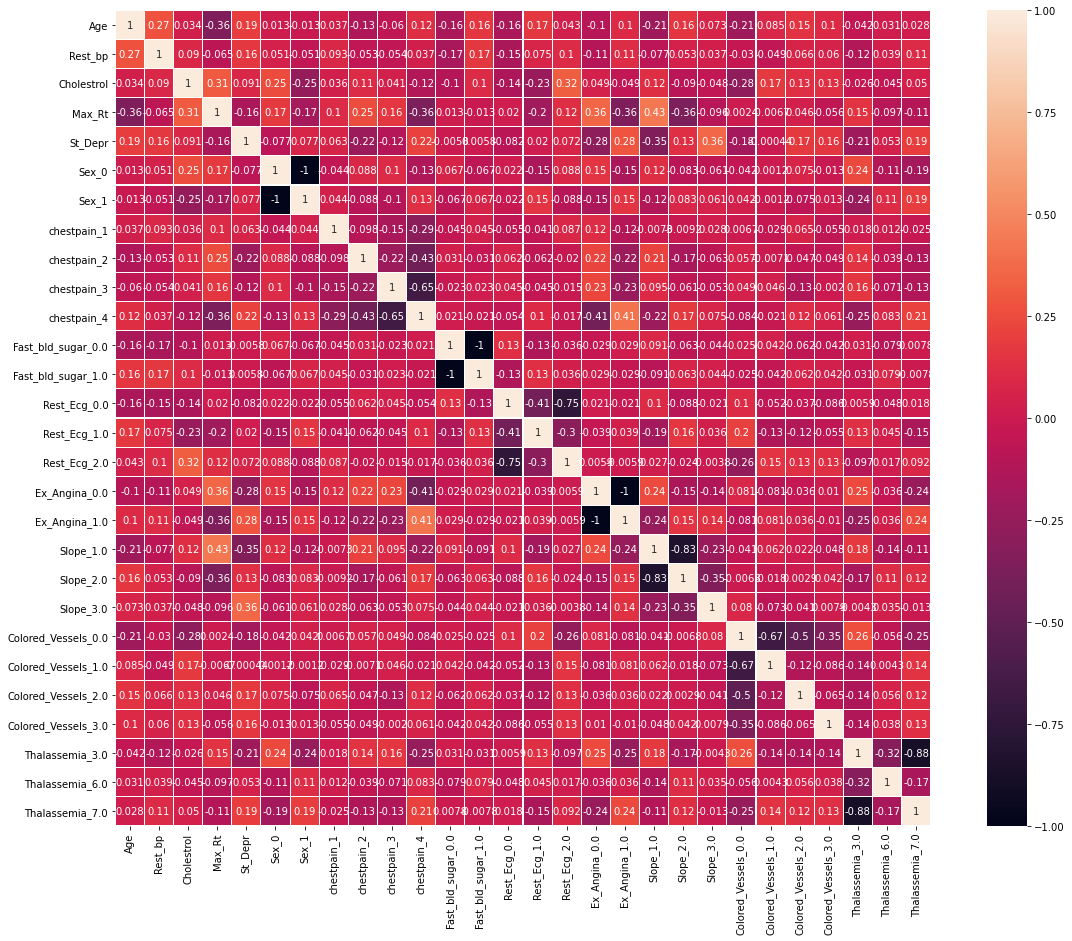

In [646]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [647]:
df1.Target=df1.Target.astype("object")

In [648]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  929 non-null    int64  
 1   Rest_bp              929 non-null    float64
 2   Cholestrol           929 non-null    float64
 3   Max_Rt               929 non-null    float64
 4   St_Depr              929 non-null    float64
 5   Target               929 non-null    object 
 6   Sex_0                929 non-null    uint8  
 7   Sex_1                929 non-null    uint8  
 8   chestpain_1          929 non-null    uint8  
 9   chestpain_2          929 non-null    uint8  
 10  chestpain_3          929 non-null    uint8  
 11  chestpain_4          929 non-null    uint8  
 12  Fast_bld_sugar_0.0   929 non-null    uint8  
 13  Fast_bld_sugar_1.0   929 non-null    uint8  
 14  Rest_Ecg_0.0         929 non-null    uint8  
 15  Rest_Ecg_1.0         929 non-null    uin

In [680]:
X = df1.drop('Target', 1).values

y = df1["Target"].values
y=y.astype('int')

In [681]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train1.shape)

(743, 28)


In [682]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  929 non-null    int64  
 1   Rest_bp              929 non-null    float64
 2   Cholestrol           929 non-null    float64
 3   Max_Rt               929 non-null    float64
 4   St_Depr              929 non-null    float64
 5   Target               929 non-null    object 
 6   Sex_0                929 non-null    uint8  
 7   Sex_1                929 non-null    uint8  
 8   chestpain_1          929 non-null    uint8  
 9   chestpain_2          929 non-null    uint8  
 10  chestpain_3          929 non-null    uint8  
 11  chestpain_4          929 non-null    uint8  
 12  Fast_bld_sugar_0.0   929 non-null    uint8  
 13  Fast_bld_sugar_1.0   929 non-null    uint8  
 14  Rest_Ecg_0.0         929 non-null    uint8  
 15  Rest_Ecg_1.0         929 non-null    uin

In [683]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

LR: 0.850983 (0.045287)
LDA: 0.854580 (0.055598)
KNN: 0.781951 (0.064610)
CART: 0.869101 (0.059022)
NB: 0.805313 (0.058857)
RF: 0.921171 (0.031210)
SVM: 0.983704 (0.014835)
XGB: 0.926067 (0.031493)


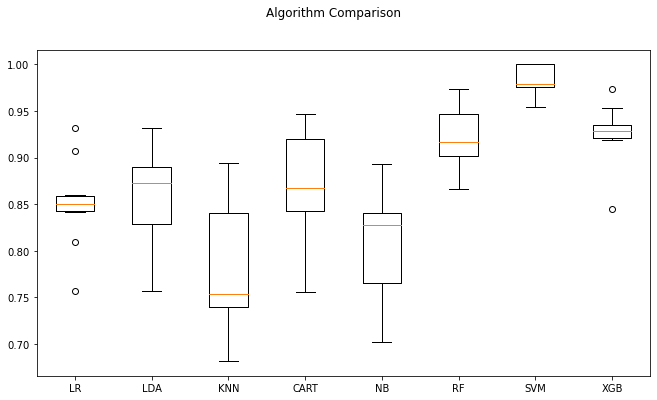

In [688]:
# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
